In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings

# Ignore formatting-related RuntimeWarnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2223data/top5-players.csv
/kaggle/input/football-2023-2024-eda-and-pa-with-logos/Rplot001.png
/kaggle/input/football-2023-2024-eda-and-pa-with-logos/__results__.html
/kaggle/input/football-2023-2024-eda-and-pa-with-logos/__notebook__.ipynb
/kaggle/input/football-2023-2024-eda-and-pa-with-logos/__output__.json
/kaggle/input/football-2023-2024-eda-and-pa-with-logos/custom.css
/kaggle/input/football-2023-2024-eda-and-pa-with-logos/__results___files/__results___80_0.png
/kaggle/input/football-2023-2024-eda-and-pa-with-logos/__results___files/__results___144_0.png
/kaggle/input/football-2023-2024-eda-and-pa-with-logos/__results___files/__results___72_0.png
/kaggle/input/football-2023-2024-eda-and-pa-with-logos/__results___files/__results___76_0.png
/kaggle/input/football-2023-2024-eda-and-pa-with-logos/__results___files/__results___100_0.png
/kaggle/input/football-2023-2024-eda-and-pa-with-logos/__results___files/__results___40_0.png
/kaggle/input/football-2023-2024-eda-and-pa

In [2]:
players_data = pd.read_csv('/kaggle/input/football-players-stats-2024-2025/players_data_light-2024_2025.csv')
players_data.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Att (GK),Thr,Launch%,AvgLen,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,24.0,2000.0,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Max Aarons,eng ENG,"DF,MF",Valencia,es La Liga,24.0,2000.0,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Rodrigo Abajas,es ESP,DF,Valencia,es La Liga,21.0,2003.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,James Abankwah,ie IRL,"DF,MF",Udinese,it Serie A,20.0,2004.0,6,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,18.0,2006.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:


players_data = players_data[players_data['Gls'].notna()]
players_data['Gls'] = pd.to_numeric(players_data['Gls'], errors='coerce')

# Group by Squad and sum total goals
squad_goals = players_data.groupby( 'Squad')['Gls'].sum().sort_values(ascending=False)

# Show top 10 squads by total goals
print(squad_goals.head(20))

Squad
Barcelona          99
Bayern Munich      96
Paris S-G          89
Liverpool          85
Real Madrid        78
Atalanta           76
Inter              76
Manchester City    71
Marseille          70
Leverkusen         70
Villarreal         69
Dortmund           69
Eint Frankfurt     68
Atlético Madrid    68
Arsenal            67
Newcastle Utd      66
Brentford          65
Brighton           64
Monaco             63
Lyon               62
Name: Gls, dtype: int64


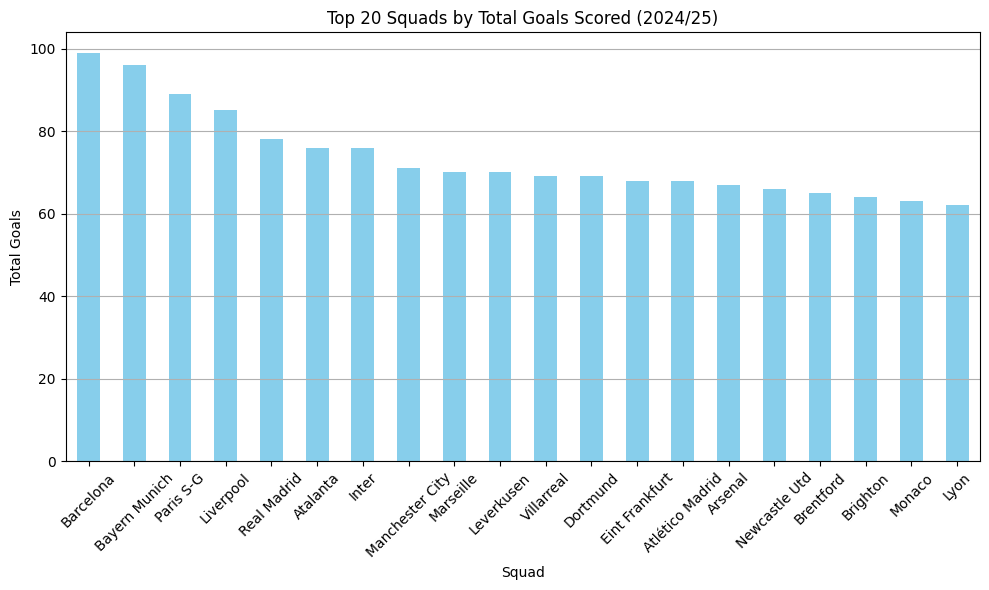

In [4]:
squad_goals.head(20).plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title('Top 20 Squads by Total Goals Scored (2024/25)')
plt.xlabel('Squad')
plt.ylabel('Total Goals')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [5]:
players_dataPrev = pd.read_csv('/kaggle/input/2223data/top5-players.csv')


In [6]:
players_dataPrev = players_dataPrev[players_dataPrev['Gls'].notna()]
players_dataPrev['Gls'] = pd.to_numeric(players_dataPrev['Gls'], errors='coerce')

# Group by Squad and sum total goals
squad_goalsPrev = players_dataPrev.groupby( 'Squad')['Gls'].sum().sort_values(ascending=False)

# Show top 10 squads by total goals
print(squad_goalsPrev.head(20))

Squad
Manchester City    94
Bayern Munich      93
Inter              87
Leverkusen         87
Arsenal            86
Real Madrid        85
Girona             84
Newcastle Utd      83
Liverpool          80
Stuttgart          78
Paris S-G          78
Barcelona          76
Milan              76
Chelsea            76
RB Leipzig         74
Atalanta           72
Aston Villa        72
Tottenham          69
Atlético Madrid    68
Dortmund           68
Name: Gls, dtype: int64


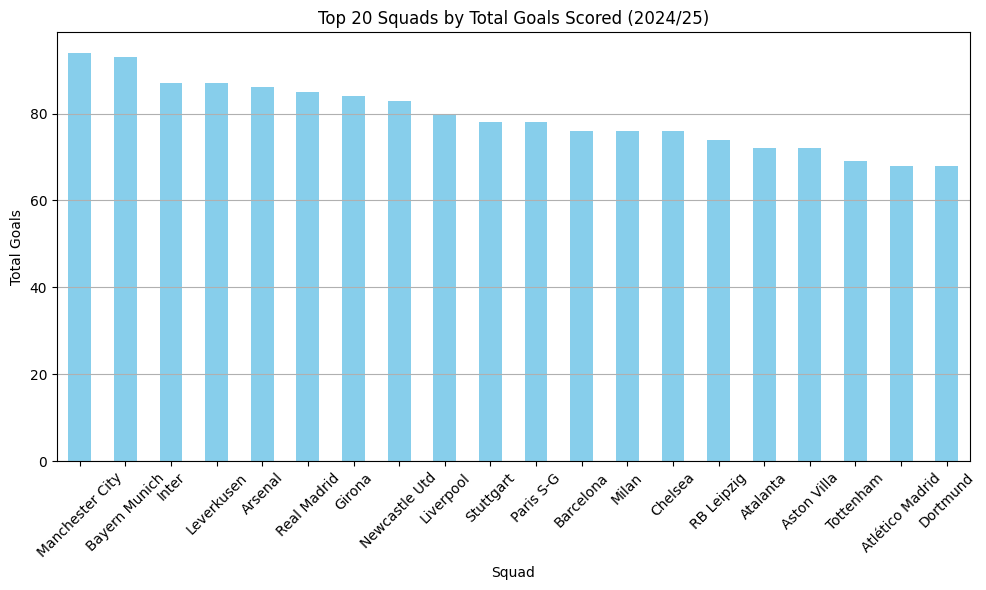

In [7]:
squad_goalsPrev.head(20).plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title('Top 20 Squads by Total Goals Scored (2024/25)')
plt.xlabel('Squad')
plt.ylabel('Total Goals')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Analyzing the team which has improved the most this season compared to previous season


In [8]:



# Combine into DataFrame (as before)
goals_compare = pd.DataFrame({
    'Prev_Season_Gls': squad_goalsPrev,
    'Curr_Season_Gls': squad_goals
})

# Keep only squads that appear in both seasons (no NaNs)
goals_compare = goals_compare.dropna()

# Calculate improvement
goals_compare['Improvement'] = goals_compare['Curr_Season_Gls'] - goals_compare['Prev_Season_Gls']

# Sort by improvement descending
top_improved_squads = goals_compare.sort_values(by='Improvement', ascending=False)

print(top_improved_squads.head(10))


                Prev_Season_Gls  Curr_Season_Gls  Improvement
Squad                                                        
Barcelona                  76.0             99.0         23.0
Nice                       39.0             62.0         23.0
Marseille                  50.0             70.0         20.0
Eint Frankfurt             48.0             68.0         20.0
Strasbourg                 36.0             54.0         18.0
Mainz 05                   38.0             53.0         15.0
Lazio                      46.0             60.0         14.0
Lyon                       48.0             62.0         14.0
Brighton                   50.0             64.0         14.0
Celta Vigo                 45.0             58.0         13.0


Graphically representing the most improved squad at top 5 league from past 2 seasons in terms of goal scoring

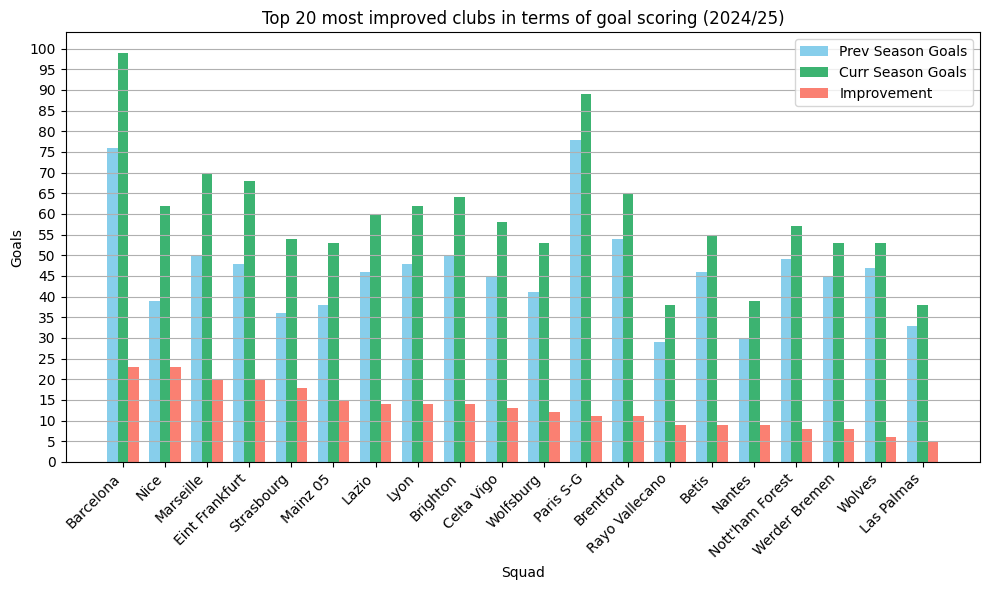

In [9]:

top20 = top_improved_squads.head(20)

# Prepare data for plotting
df_plot = top20[['Prev_Season_Gls', 'Curr_Season_Gls', 'Improvement']]

# Bar positions
ind = np.arange(len(df_plot))
width = 0.25

fig, ax = plt.subplots(figsize=(10,6))

# Plot bars
ax.bar(ind - width, df_plot['Prev_Season_Gls'], width, label='Prev Season Goals', color='skyblue')
ax.bar(ind, df_plot['Curr_Season_Gls'], width, label='Curr Season Goals', color='mediumseagreen')
ax.bar(ind + width, df_plot['Improvement'], width, label='Improvement', color='salmon')

# Titles and labels
ax.set_title('Top 20 most improved clubs in terms of goal scoring (2024/25)')
ax.set_xlabel('Squad')
ax.set_ylabel('Goals')
ax.set_xticks(ind)
ax.set_xticklabels(df_plot.index, rotation=45, ha='right')
ax.grid(axis='y')
ymin, ymax = ax.get_ylim()
ax.set_yticks(np.arange(int(ymin), int(ymax) + 1, 5))


ax.legend()

plt.tight_layout()
plt.show()


Now analyzing the team which has declined the most in terms of goal scoring as compared to previous seasons


In [10]:
goals_compare = pd.DataFrame({
    'Prev_Season_Gls': squad_goalsPrev,
    'Curr_Season_Gls': squad_goals
})

# Keep only squads that appear in both seasons (no NaNs)
goals_compare = goals_compare.dropna()

# Calculate improvement
goals_compare['Improvement'] = goals_compare['Curr_Season_Gls'] - goals_compare['Prev_Season_Gls']

# Sort by improvement descending
worst_declined_squads = goals_compare.sort_values(by='Improvement', ascending=True)

print(worst_declined_squads.head(10))


                 Prev_Season_Gls  Curr_Season_Gls  Improvement
Squad                                                         
Girona                      84.0             43.0        -41.0
RB Leipzig                  74.0             51.0        -23.0
Manchester City             94.0             71.0        -23.0
Arsenal                     86.0             67.0        -19.0
Hoffenheim                  65.0             46.0        -19.0
Montpellier                 41.0             23.0        -18.0
Stuttgart                   78.0             61.0        -17.0
Milan                       76.0             59.0        -17.0
Leverkusen                  87.0             70.0        -17.0
Newcastle Utd               83.0             66.0        -17.0


Graphically representing the worst declined squad at top 5 league from past 2 seasons in terms of goal scoring

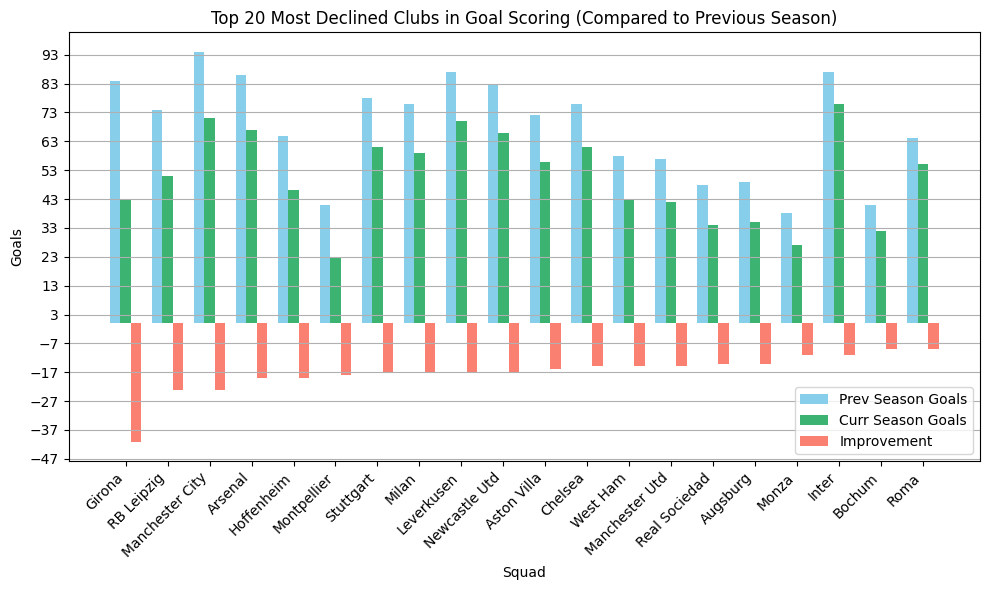

In [11]:


top20_declined = worst_declined_squads.head(20)

df_plot = top20_declined[['Prev_Season_Gls', 'Curr_Season_Gls', 'Improvement']]
ind = np.arange(len(df_plot))
width = 0.25

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(ind - width, df_plot['Prev_Season_Gls'], width, label='Prev Season Goals', color='skyblue')
ax.bar(ind, df_plot['Curr_Season_Gls'], width, label='Curr Season Goals', color='mediumseagreen')
ax.bar(ind + width, df_plot['Improvement'], width, label='Improvement', color='salmon')

ax.set_title('Top 20 Most Declined Clubs in Goal Scoring (Compared to Previous Season)')
ax.set_xlabel('Squad')
ax.set_ylabel('Goals')
ax.set_xticks(ind)
ax.set_xticklabels(df_plot.index, rotation=45, ha='right')
ax.grid(axis='y')
ymin, ymax = ax.get_ylim()
ax.set_yticks(np.arange(int(ymin), int(ymax) + 1, 10))

ax.legend()

plt.tight_layout()
plt.show()
